# Houseprice classification model using ANN


In [73]:
#importing necessary library
import pandas as pd
import warnings;
warnings.simplefilter("ignore", UserWarning)

In [74]:
#importing dataset
df = pd.read_csv('housepricedata.csv')
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [56]:
#Defining datatset
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


In [57]:
X

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea
0,8450,7,5,856,2,1,3,8,0,548
1,9600,6,8,1262,2,0,3,6,1,460
2,11250,7,5,920,2,1,3,6,1,608
3,9550,7,5,756,1,0,3,7,1,642
4,14260,8,5,1145,2,1,4,9,1,836
...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460
1456,13175,6,6,1542,2,0,3,7,2,500
1457,9042,7,9,1152,2,0,4,9,2,252
1458,9717,5,6,1078,1,0,2,5,0,240


In [58]:
y

0       1
1       1
2       1
3       0
4       1
       ..
1455    1
1456    1
1457    1
1458    0
1459    0
Name: AboveMedianPrice, Length: 1460, dtype: int64

In [59]:
#Scaling datatset using MinMaxSclaer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [60]:
#Splitting dataset into training and testing
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=1)
print(f" X_train_Shape:{X_train.shape}\n X_test_Shape:{X_test.shape}\n Y_train_shape:{y_train.shape}\n Y_Test_shape:{y_test.shape}")


 X_train_Shape:(1022, 10)
 X_test_Shape:(438, 10)
 Y_train_shape:(1022,)
 Y_Test_shape:(438,)


In [61]:
#Creating ANN model using keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

In [75]:
#creating layers
input_layer = Dense(20,input_shape=(10,))
model.add(input_layer)

hidden_layer_1 = Dense(20,activation = 'relu')
model.add(hidden_layer_1)

hidden_layer_2 = Dense(20,activation='relu')
model.add(hidden_layer_2)

output_layer = Dense(1,activation='sigmoid')
model.add(output_layer)

In [63]:
# model.add(Dense(20,activation = 'relu'))
# model.add(Dense(20,activation='relu'))
# model.add(Dense(1,activation='sigmoid'))

In [64]:
#Compiling the model
model.compile(loss = 'binary_crossentropy',optimizer= 'sgd',metrics=['accuracy'])


In [65]:
#Training the model
hist = model.fit(X_train,y_train,batch_size=20,epochs=100,validation_data=(X_test,y_test),verbose=2)

Epoch 1/100
52/52 - 1s - 28ms/step - accuracy: 0.6624 - loss: 0.6774 - val_accuracy: 0.7078 - val_loss: 0.6688
Epoch 2/100
52/52 - 0s - 6ms/step - accuracy: 0.6986 - loss: 0.6646 - val_accuracy: 0.7420 - val_loss: 0.6589
Epoch 3/100
52/52 - 0s - 6ms/step - accuracy: 0.7515 - loss: 0.6544 - val_accuracy: 0.7648 - val_loss: 0.6487
Epoch 4/100
52/52 - 0s - 5ms/step - accuracy: 0.7534 - loss: 0.6440 - val_accuracy: 0.7877 - val_loss: 0.6384
Epoch 5/100
52/52 - 0s - 5ms/step - accuracy: 0.7642 - loss: 0.6336 - val_accuracy: 0.7991 - val_loss: 0.6254
Epoch 6/100
52/52 - 0s - 5ms/step - accuracy: 0.7896 - loss: 0.6204 - val_accuracy: 0.8037 - val_loss: 0.6109
Epoch 7/100
52/52 - 0s - 5ms/step - accuracy: 0.7896 - loss: 0.6063 - val_accuracy: 0.8311 - val_loss: 0.5949
Epoch 8/100
52/52 - 0s - 5ms/step - accuracy: 0.8033 - loss: 0.5896 - val_accuracy: 0.8219 - val_loss: 0.5758
Epoch 9/100
52/52 - 0s - 5ms/step - accuracy: 0.8092 - loss: 0.5703 - val_accuracy: 0.7945 - val_loss: 0.5559
Epoch 10/

In [68]:
#Evaluating the model
val_loss,val_acc = model.evaluate(X_test,y_test)
print(f"Val_Loss:{val_loss}\nVal_Accuracy:{val_acc}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8995 - loss: 0.2278 
Val_Loss:0.22778086364269257
Val_Accuracy:0.8995434045791626


In [69]:
#Making pediction on new data
user_ip = [[14260,8,5,1145,2,1,4,9,1,836]]

scaled_input = scaler.transform(user_ip)

In [70]:
result = model.predict(scaled_input)
if result >= 0.5:
    print("1")
else:
    print("0")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1


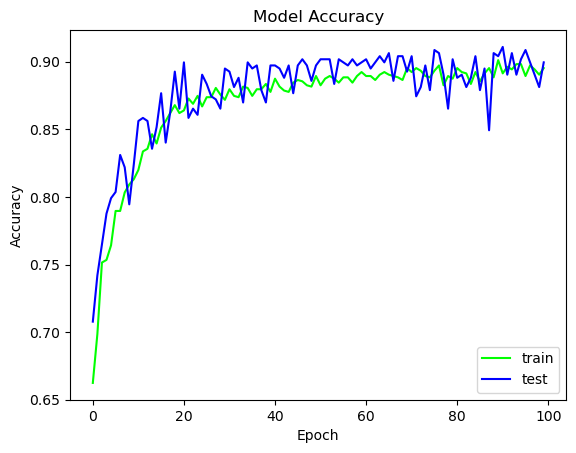

In [71]:
#Visualization between accuracy in every epoch
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'],color='lime')
plt.plot(hist.history['val_accuracy'],color='blue')
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['train','test'],loc = 'lower right')
plt.show()

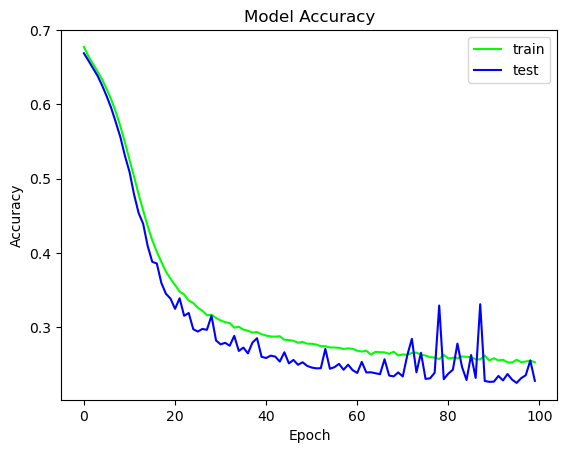

In [72]:
#Visualization of  loss function in every epoch
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'],color='lime')
plt.plot(hist.history['val_loss'],color='blue')
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['train','test'],loc = 'upper right')
plt.show()

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


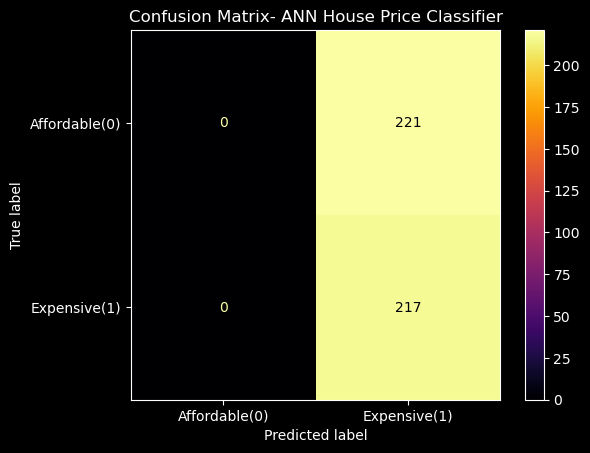

In [83]:
#Confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

y_pred = (model.predict(X_test) >= 0.5).astype("int32")

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=['Affordable(0)',"Expensive(1)"])
disp.plot(cmap='inferno')
plt.title("Confusion Matrix- ANN House Price Classifier")
plt.show()
plt.style.use('dark_background')

In [84]:
#classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       221
           1       0.50      1.00      0.66       217

    accuracy                           0.50       438
   macro avg       0.25      0.50      0.33       438
weighted avg       0.25      0.50      0.33       438

